In [59]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math as m



In [60]:
df_test = pd.read_csv('5297Q_2014-16.txt',
                      usecols =["DATUM","MESSWERT_NUM"] ,
                      index_col=0, 
                      parse_dates=True, 
                      infer_datetime_format=True,
                      dayfirst=True,
                      decimal='.',
                      sep=",")

In [61]:
df_test

,MESSWERT_NUM
DATUM,
2014-06-01,448.40
2014-06-02,448.40
2014-06-03,448.40
2014-06-04,448.40
2014-06-05,448.40
2014-06-06,448.40
2014-06-07,448.40
2014-06-08,448.40
2014-06-09,448.40


In [76]:
X = np.array(df_test.index.values - df_test.index.values.min() , dtype=(float)) / (1e9 * 60 * 60 * 24)

df_test = df_test.assign(X =X[:])
noise_mean = 0
noise_std = 0.2
df_test["Y"] = 0. 
df_test["noise"] = np.random.randn(len(df_test)) * noise_std + noise_mean
df_test["confidence95"] = noise_std * 1.96
df_test["measurement"] = df_test["MESSWERT_NUM"] + df_test["noise"]

P = np.array( df_test.dropna().reset_index()[['DATUM','Y','MESSWERT_NUM']] )

In [77]:
def test (data = df_test, n_sample=None):
    df_z = data
    if n_sample is not None:
        df_z = data.sample(n_sample)
    return df_z    

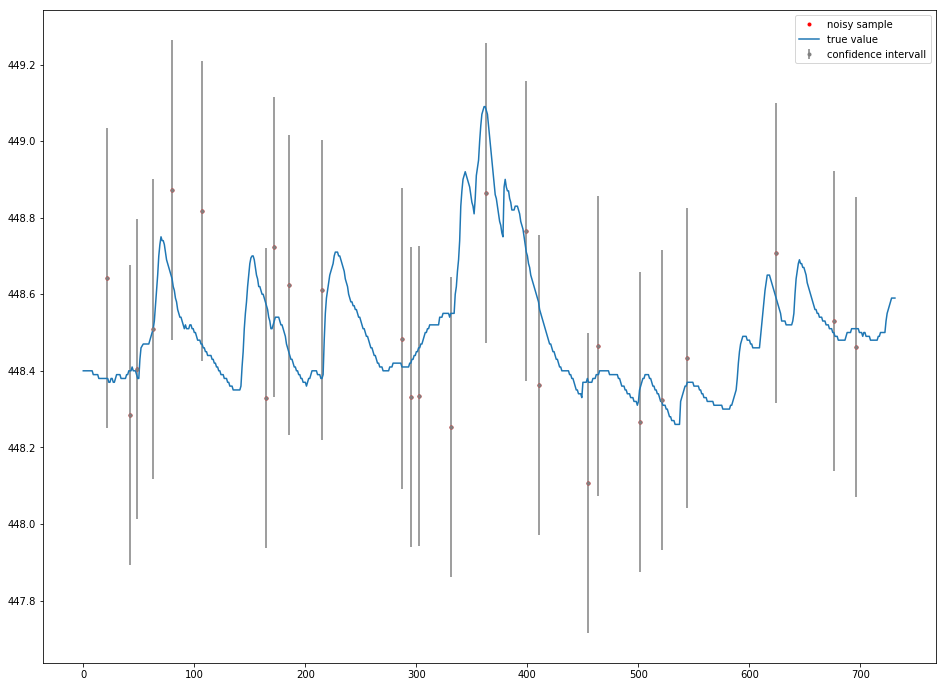

In [78]:
df_z = test(data=df_test, n_sample=25)
plt.rcParams["figure.figsize"] = (16, 12)
plt.plot(df_z.X, df_z.measurement, '.', label='noisy sample', color = "red")
plt.plot(df_test.X, df_test.MESSWERT_NUM, label="true value")
plt.errorbar(df_z.X, df_z.measurement, df_z.confidence95, fmt='.',
             label='confidence intervall', color="grey")

plt.legend()
df_z.to_excel(r".\example_data\timeseries14.xlsx")
plt.show()

In [79]:
df_z

,MESSWERT_NUM,X,Y,noise,confidence95,measurement
DATUM,,,,,,
2015-03-15,448.41,287.0,0.0,0.074249,0.392,448.484249
2015-11-27,448.37,544.0,0.0,0.062660,0.392,448.432660
2016-04-27,448.51,696.0,0.0,-0.046939,0.392,448.463061
2015-08-30,448.37,455.0,0.0,-0.263210,0.392,448.106790
2015-10-15,448.35,501.0,0.0,-0.083987,0.392,448.266013
2015-11-04,448.32,521.0,0.0,0.003888,0.392,448.323888
2015-09-08,448.39,464.0,0.0,0.073919,0.392,448.463919
2014-08-03,448.51,63.0,0.0,-0.000461,0.392,448.509539
2016-02-15,448.59,624.0,0.0,0.117300,0.392,448.707300


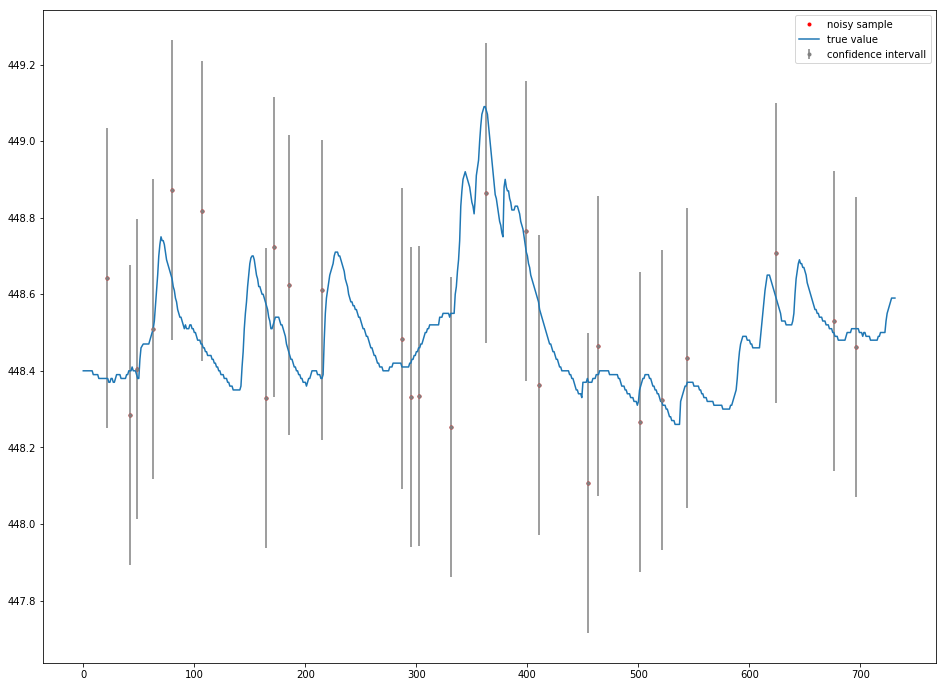

In [80]:
df_z = pd.read_excel(r".\example_data\timeseries14.xlsx")

plt.plot(df_z.X, df_z.measurement, '.', label='noisy sample', color = "red")
plt.plot(df_test.X, df_test.MESSWERT_NUM, label="true value")
plt.errorbar(df_z.X, df_z.measurement, df_z.confidence95, fmt='.',
             label='confidence intervall', color="grey")

plt.legend()
plt.show()

In [81]:
df_z

,DATUM,MESSWERT_NUM,X,Y,noise,confidence95,measurement
0,2015-03-15,448.41,287,0,0.074249,0.392,448.484249
1,2015-11-27,448.37,544,0,0.062660,0.392,448.432660
2,2016-04-27,448.51,696,0,-0.046939,0.392,448.463061
3,2015-08-30,448.37,455,0,-0.263210,0.392,448.106790
4,2015-10-15,448.35,501,0,-0.083987,0.392,448.266013
5,2015-11-04,448.32,521,0,0.003888,0.392,448.323888
6,2015-09-08,448.39,464,0,0.073919,0.392,448.463919
7,2014-08-03,448.51,63,0,-0.000461,0.392,448.509539
8,2016-02-15,448.59,624,0,0.117300,0.392,448.707300
9,2015-01-02,448.38,215,0,0.231747,0.392,448.611747
